# Pymaceuticals Inc.
---

### Analysis

- "Infubinol", "Ceftamin" are less effective than "Capomulin" and "Ramicane" based on the tumor size reduction in the mice

- "Capomulin" "Ramicane" have a tighter box for their boxplot than the other, which means they have a better probability of working consistantly rather than variable results with the high spread that is shown for "Ceftamin"

- "Capomulin" "Ramicane" mice were studied the most in this data set, as they have the highest count of timepoints

 

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
capo_study = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])
# Display the data table for preview
capo_study.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [48]:
# Checking the number of mice.
len(capo_study["Mouse ID"].value_counts())

249

In [49]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = capo_study.loc[capo_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [99]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mergedclean = capo_study.loc[capo_study['Mouse ID'] != "g989"]
#mergedclean.head()

In [52]:
# Checking the number of mice in the clean DataFrame.
len(mergedclean["Mouse ID"].value_counts())

248

## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean =  mergedclean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median =  mergedclean.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var =  mergedclean.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std =  mergedclean.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM =  mergedclean.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

SummaryStatistics = pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,"Tumor Volume Variance": var, "Tumor Volume Std.Dev.":std, "Tumor Volume Std. Err.":SEM})
SummaryStatistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
Summary_Statistics = mergedclean.groupby("Drug Regimen").agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
Summary_Statistics

C:\Users\Amir\AppData\Local\Temp\ipykernel_3164\1783200839.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  Summary_Statistics = mergedclean.groupby("Drug Regimen").agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Time points')

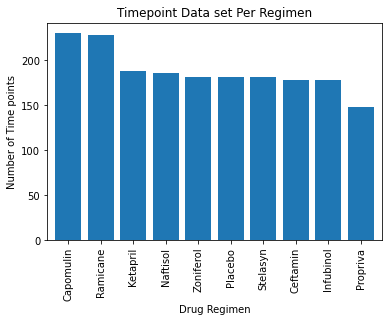

In [83]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
totaltimepoint_df = mergedclean.groupby("Drug Regimen").count()["Timepoint"]
totaltimepoint_df.sort_values(ascending=False).plot(kind="bar", width =0.8, title = 'Timepoint Data set Per Regimen')
plt.ylabel('Number of Time points')

Text(0, 0.5, 'Number of Time points')

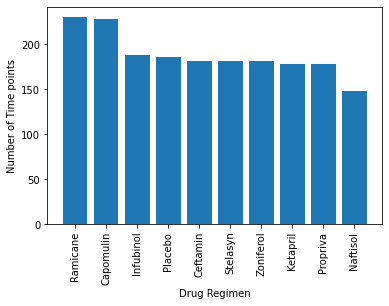

In [56]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
regimen = mergedclean["Drug Regimen"].unique()
sorted_timepoint = totaltimepoint_df.sort_values(ascending=False)
plt.bar(regimen, sorted_timepoint)
plt.xticks(rotation = "vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Time points")

Text(0, 0.5, '')

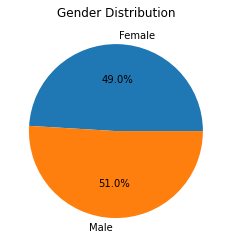

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = mergedclean.groupby(["Sex"]).count()["Mouse ID"]
gender_df.plot(kind="pie", autopct = "%1.1f%%",title = 'Gender Distribution')
plt.ylabel("")

Text(0.5, 1.0, 'Gender Distribution')

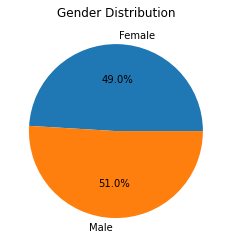

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label = ["Female", "Male"]

plt.pie(gender_df, labels = label, autopct = "%1.1f%%")
plt.title('Gender Distribution')

## Quartiles, Outliers and Boxplots

In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mergedclean.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_merge = pd.merge(mergedclean, last_timepoint, on=["Mouse ID", "Timepoint"], how = "inner")
#mouse_merge

In [60]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = [] 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for meds in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor = mouse_merge.loc[mouse_merge["Drug Regimen"]==meds,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(tumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_boundry = lowerq - (1.5*iqr)
    upper_boundry = upperq + (1.5*iqr)
    
    possible_outlier = tumor.loc[(tumor < lower_boundry) | (tumor > upper_boundry)]
    print(f"A possible outlier for {meds} is {possible_outlier}")

A possible outlier for Capomulin is Series([], Name: Tumor Volume (mm3), dtype: float64)
A possible outlier for Ramicane is Series([], Name: Tumor Volume (mm3), dtype: float64)
A possible outlier for Infubinol is 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
A possible outlier for Ceftamin is Series([], Name: Tumor Volume (mm3), dtype: float64)


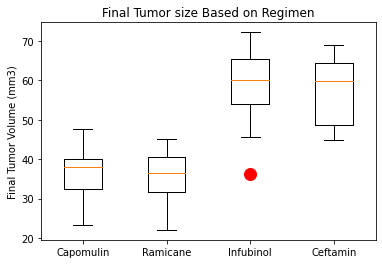

In [61]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels = drugs, sym="r", flierprops={'markersize':12})
plt.ylabel("Final Tumor Volume (mm3)")
plt.title('Final Tumor size Based on Regimen');

## Line and Scatter Plots

Text(0.5, 1.0, 'The recovery of mouse m601 on Capomulin')

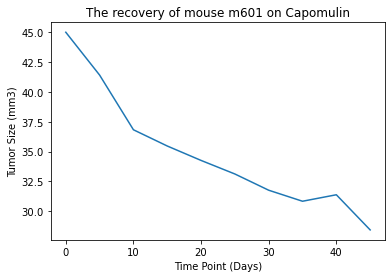

In [62]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = mergedclean.loc[mergedclean["Mouse ID"] == "m601"]
plt.plot(cap_mouse["Timepoint"],cap_mouse["Tumor Volume (mm3)"])
plt.xlabel("Time Point (Days)")
plt.ylabel("Tumor Size (mm3)")
plt.title("The recovery of mouse m601 on Capomulin")

(34.0, 47.0)

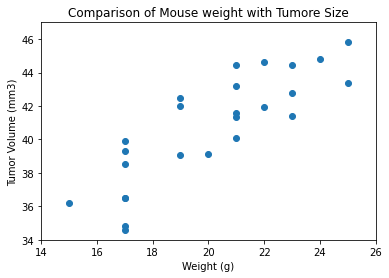

In [108]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_mice = mergedclean.loc[mergedclean["Drug Regimen"] == "Capomulin"]

mice_weight = cap_mice.groupby("Mouse ID").mean()

plt.scatter(mice_weight["Weight (g)"], mice_weight["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Comparison of Mouse weight with Tumore Size")
plt.xlim(14,26)
plt.ylim(34,47)

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


(34.0, 47.0)

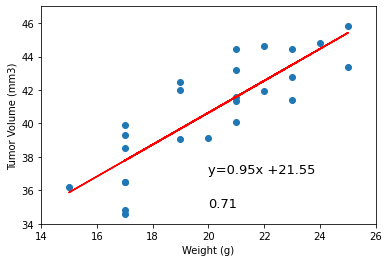

In [109]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

x_val=mice_weight["Weight (g)"]
y_val=mice_weight["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val,y_val)
regress_values = slope*mice_weight["Weight (g)"]+intercept
line_eq = "y=" + str(round(slope,2))+"x +" + str(round(intercept,2))
plt.scatter(mice_weight["Weight (g)"], mice_weight["Tumor Volume (mm3)"])
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(20,37), fontsize = 13, color = "black")

r_squared = round(rvalue**2,2)
plt.annotate(r_squared,(20,35), fontsize = 13, color = "black")
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(14,26)
plt.ylim(34,47)